In [1]:
import pandas as pd
import sqlite3
import gzip
import shutil
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')

In [4]:
movie_info = pd.read_csv('unzippedData/rt.movie_info.tsv',sep = '\t')

In [5]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')

In [6]:
rt_score = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding = 'latin-1')

In [7]:
rt_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [8]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [12]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [13]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 316.3+ KB


In [14]:
conn = sqlite3.connect('unzippedData/im.db')

In [15]:
movie_basics = pd.read_sql("""
SELECT *

FROM movie_basics

""",conn)

In [16]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
movie_basics.groupby('genres').size()

genres
Action                               2219
Action,Adult,Comedy                     2
Action,Adventure                      114
Action,Adventure,Animation            197
Action,Adventure,Biography             34
Action,Adventure,Comedy               332
Action,Adventure,Crime                 78
Action,Adventure,Documentary          172
Action,Adventure,Drama                239
Action,Adventure,Family                35
Action,Adventure,Fantasy              142
Action,Adventure,History               18
Action,Adventure,Horror                63
Action,Adventure,Music                  3
Action,Adventure,Musical                1
Action,Adventure,Mystery               14
Action,Adventure,Romance               10
Action,Adventure,Sci-Fi               152
Action,Adventure,Sport                  3
Action,Adventure,Thriller              73
Action,Adventure,War                   10
Action,Adventure,Western               15
Action,Animation                       15
Action,Animation,Biography 

In [18]:
movie_basics[movie_basics['primary_title'] == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror


In [19]:
movie_akas = pd.read_sql("""
SELECT *

FROM movie_akas

""",conn)

In [20]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [21]:
movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 316.3+ KB


In [22]:
badf = pd.read_sql("""
SELECT *

FROM 
    movie_ratings AS mr
    INNER JOIN movie_basics AS mb
    USING (movie_id)


""",conn)

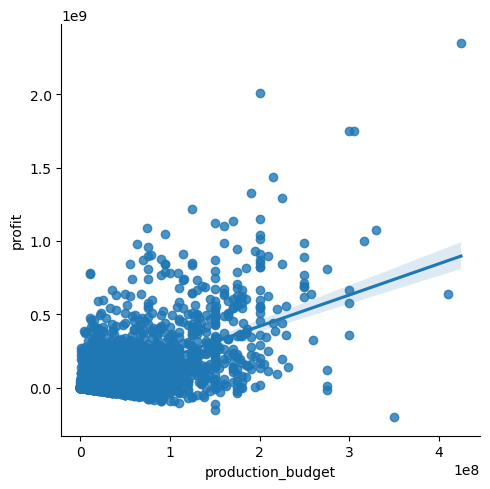

In [23]:
ax = sns.lmplot(data = movie_budgets, x = 'production_budget', y  = 'profit')

In [24]:
badf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


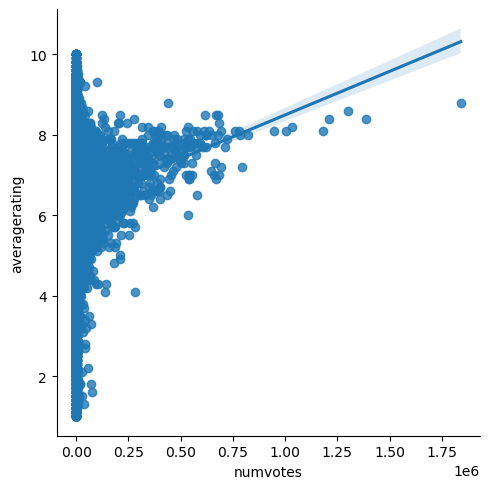

In [25]:
ax = sns.lmplot(data = badf, x = 'numvotes', y  = 'averagerating')

In [26]:
mega_df = badf.merge(movie_budgets,
          left_on = 'primary_title'
          ,right_on = 'movie'
          ,how = 'inner').sort_values(by = 'profit', ascending = False)

In [27]:
badf.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [28]:
genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Biography', 'Musical']
for genre in genre_list:
    mega_df[genre] = mega_df['genres'].str.contains(genre)

In [29]:
mega_df[(mega_df['Action'] == True) & (mega_df['Adventure'] == True)].head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,Action,Adventure,Comedy,Family,Crime,Thriller,Sport,Animation,Horror,Fantasy,Romance,Sci-Fi,Documentary,History,Music,Mystery,Drama,War,Biography,Musical
2835,tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
518,tt0369610,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2168,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
640,tt1825683,7.3,516148,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
583,tt4881806,6.2,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [32]:
mega_df.groupby('genres')['profit'].mean().sort_values(ascending = False).head()

genres
Adventure,Drama,Sport      1.122470e+09
Fantasy,Romance            1.122470e+09
Family,Fantasy,Musical     8.438154e+08
Adventure,Fantasy          4.695440e+08
Action,Adventure,Sci-Fi    4.385199e+08
Name: profit, dtype: float64

In [ ]:
mega_df.head()

In [ ]:
mega_df.loc[mega_df['production_budget'] > 100000].head(50)


In [ ]:
sns.lmplot(data = mega_df, x = 'averagerating', y = 'profit')

In [ ]:
pd.read_sql("""
SELECT DISTINCT * 

FROM persons 
INNER JOIN directors
ON persons.person_id = directors.person_id

LIMIT 10
""", conn)

In [ ]:
movie_budgets.sort_values(by='profit',ascending = False).head()

In [ ]:
import math

In [ ]:
sns.histplot(mega_df[mega_df['Action'] == True]['averagerating'])

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(18, 18))
y = 0
x = 0
for genre in genre_list:
    sns.histplot(mega_df[mega_df[genre] == True]['averagerating'], ax = axs[math.floor(x),y%4])
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = mega_df[mega_df[genre] == True]['averagerating'].mean(), color = 'black', lw = 3)
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Average Rating per Genre')
    y += 1
    x += .25

In [ ]:
import zipfile
with zipfile.ZipFile('zippedData/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [38]:
imdb_df = pd.read_csv('unzippedData/imdb_movies.csv')

In [41]:
imdb_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,Adventure,Comedy,Family,Crime,Thriller,Animation,Horror,Fantasy,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,True,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,True,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War']

for genre in genre_list:
    imdb_df[genre] = imdb_df['genre'].str.contains(genre)

In [ ]:
imdb_df.groupby()